In [1]:
import numpy as np
import matplotlib
import pandas as pd

In [2]:
data = pd.read_csv('C:/Users/ashte/Downloads/Churn_Modelling.csv')

In [3]:
X = data.iloc[:, 3:13].values
type(X)

numpy.ndarray

In [4]:
y = data.iloc[:,13].values

In [6]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
X[:,2]

array(['Female', 'Female', 'Female', ..., 'Female', 'Male', 'Female'],
      dtype=object)

In [5]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:,2] = labelencoder.fit_transform(X[:,2])
X

array([[619, 'France', 0, ..., 1, 1, 101348.88],
       [608, 'Spain', 0, ..., 0, 1, 112542.58],
       [502, 'France', 0, ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 0, ..., 0, 1, 42085.58],
       [772, 'Germany', 1, ..., 1, 0, 92888.52],
       [792, 'France', 0, ..., 1, 0, 38190.78]], dtype=object)

In [6]:
X[:,1] = labelencoder.fit_transform(X[:,1])

In [7]:
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([("Country", OneHotEncoder(), [1])], remainder= 'passthrough')
X = ct.fit_transform(X)

In [8]:
X = pd.DataFrame(X, columns =["X1", "X2", "X3", "CreditScore", "Gender", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary"])

In [9]:
X= X.drop("X1", axis = 1)
X

,X2,X3,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0,0,619,0,42,2,0,1,1,1,101349
1,0,1,608,0,41,1,83807.9,1,0,1,112543
2,0,0,502,0,42,8,159661,3,1,0,113932
3,0,0,699,0,39,1,0,2,0,0,93826.6
4,0,1,850,0,43,2,125511,1,1,1,79084.1
...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,771,1,39,5,0,2,1,0,96270.6
9996,0,0,516,1,35,10,57369.6,1,1,1,101700
9997,0,0,709,0,36,7,0,1,0,1,42085.6
9998,1,0,772,1,42,3,75075.3,2,1,0,92888.5


In [8]:
type(y)

numpy.ndarray

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 0)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train  = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
X.shape

(10000, 11)

In [13]:
y.shape

(10000,)

In [14]:
import keras
from keras.models import Sequential
from keras.layers import Dense
classifier = Sequential()
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation ='relu', input_dim = 11))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation ='relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation ='sigmoid'))
classifier.compile(optimizer = 'adam', loss= 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Using TensorFlow backend.
C:\Users\ashte\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ashte\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ashte\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ashte\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/100
8000/8000 [==============================] - 1s 126us/step - loss: 0.4828 - accuracy: 0.7955
Epoch 2/100
8000/8000 [==============================] - 1s 97us/step - loss: 0.4272 - accuracy: 0.7960
Epoch 3/100
8000/8000 [==============================] - 1s 98us/step - loss: 0.4209 - accuracy: 0.8050
Epoch 4/100
8000/8000 [==============================] - 1s 100us/step - loss: 0.4183 - accuracy: 0.8236
Epoch 5/100
8000/8000 [==============================] - 1s 130us/step - loss: 0.4154 - accuracy: 0.8298
Epoch 6/100
8000/8000 [==============================] - 1s 108us/step - loss: 0.4141 - accuracy: 0.8266
Epoch 7/100
8000/8000 [==============================] - 1s 94us/step - loss: 0.4122 - accuracy: 0.8304
Epoch 8/100
8000/8000 [==============================] - 1s 98us/step - loss: 0.4108 - accuracy: 0.8329
Epoch 9/100
8000/8000 [==============================] - 1s 101us/ste

In [18]:
from sklearn import metrics
y_pred = classifier.predict(X_test)
i = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95,]
accuracy = []
for cutoff in i:
    y_pred = (classifier.predict(X_test)>cutoff)
    accuracy.append(metrics.accuracy_score(y_test, y_pred))
    
accuracy

[0.4005,
 0.551,
 0.665,
 0.7255,
 0.7775,
 0.798,
 0.823,
 0.838,
 0.8435,
 0.846,
 0.845,
 0.8435,
 0.841,
 0.8375,
 0.8345,
 0.8275,
 0.82,
 0.809,
 0.7995]

accuracy: 0.841


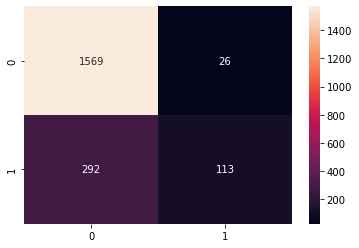

In [19]:
import seaborn as sns
from sklearn import metrics
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.65)
print("accuracy:", metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt ='')

In [20]:


# New Customer
# Geography; France (0,0)
# Credit Score: 600
# Gender: Male (1)
# Age: 40 years old
# Tenure: 3 years
# Balance: $60000
# Number of Products: 2
# Does this customer have a credit card? Yes (1)
# Is this customer as Active Member: Yes (1)
# Estimated salary: $50000
# Predict the class of this customer
new_customer = classifier.predict(sc.transform(np.array([[0,0,600,1,40,3,60000,2,1,1,50000]])))
new_prediction = (new_customer > 0.5)
new_prediction

C:\Users\ashte\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([[False]])

In [23]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense


def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation ='relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation ='relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation ='sigmoid'))
    classifier.compile(optimizer = 'adam', loss= 'binary_crossentropy', metrics = ['accuracy'])
    
    return classifier 

classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs =100)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs = 1)
mean = accuracies.mean()
variance = accuracies.std()

Epoch 1/100
7200/7200 [==============================] - 1s 124us/step - loss: 0.4962 - accuracy: 0.7965
Epoch 2/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.4290 - accuracy: 0.7971
Epoch 3/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.4243 - accuracy: 0.7971
Epoch 4/100
7200/7200 [==============================] - 1s 97us/step - loss: 0.4206 - accuracy: 0.8011
Epoch 5/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.4178 - accuracy: 0.8256
Epoch 6/100
7200/7200 [==============================] - 1s 92us/step - loss: 0.4162 - accuracy: 0.8247
Epoch 7/100
7200/7200 [==============================] - 1s 104us/step - loss: 0.4148 - accuracy: 0.8283
Epoch 8/100
7200/7200 [==============================] - 1s 99us/step - loss: 0.4135 - accuracy: 0.8294
Epoch 9/100
7200/7200 [==============================] - 1s 96us/step - loss: 0.4124 - accuracy: 0.8296
Epoch 10/100
7200/7200 [==============================] - 1s 1

7200/7200 [==============================] - 1s 98us/step - loss: 0.3437 - accuracy: 0.8603
Epoch 56/100
7200/7200 [==============================] - 1s 96us/step - loss: 0.3433 - accuracy: 0.8618
Epoch 57/100
7200/7200 [==============================] - 1s 98us/step - loss: 0.3431 - accuracy: 0.8619
Epoch 58/100
7200/7200 [==============================] - 1s 92us/step - loss: 0.3433 - accuracy: 0.8601
Epoch 59/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.3422 - accuracy: 0.8624
Epoch 60/100
7200/7200 [==============================] - 1s 97us/step - loss: 0.3430 - accuracy: 0.8607
Epoch 61/100
7200/7200 [==============================] - 1s 96us/step - loss: 0.3433 - accuracy: 0.8597
Epoch 62/100
7200/7200 [==============================] - 1s 116us/step - loss: 0.3425 - accuracy: 0.8617
Epoch 63/100
7200/7200 [==============================] - 1s 112us/step - loss: 0.3431 - accuracy: 0.8593
Epoch 64/100
7200/7200 [==============================] - 1s 97us/

7200/7200 [==============================] - 1s 103us/step - loss: 0.3976 - accuracy: 0.8356
Epoch 33/100
7200/7200 [==============================] - 1s 110us/step - loss: 0.3971 - accuracy: 0.8368
Epoch 34/100
7200/7200 [==============================] - 1s 117us/step - loss: 0.3968 - accuracy: 0.8347
Epoch 35/100
7200/7200 [==============================] - 1s 99us/step - loss: 0.3964 - accuracy: 0.8354
Epoch 36/100
7200/7200 [==============================] - 1s 118us/step - loss: 0.3964 - accuracy: 0.8357
Epoch 37/100
7200/7200 [==============================] - 1s 122us/step - loss: 0.3954 - accuracy: 0.8365
Epoch 38/100
7200/7200 [==============================] - 1s 110us/step - loss: 0.3965 - accuracy: 0.8350
Epoch 39/100
7200/7200 [==============================] - 1s 110us/step - loss: 0.3965 - accuracy: 0.8371
Epoch 40/100
7200/7200 [==============================] - 1s 111us/step - loss: 0.3955 - accuracy: 0.8372
Epoch 41/100
7200/7200 [==============================] - 1s

Epoch 9/100
7200/7200 [==============================] - 1s 115us/step - loss: 0.4089 - accuracy: 0.8322
Epoch 10/100
7200/7200 [==============================] - 1s 107us/step - loss: 0.4081 - accuracy: 0.8335
Epoch 11/100
7200/7200 [==============================] - 1s 107us/step - loss: 0.4071 - accuracy: 0.8344
Epoch 12/100
7200/7200 [==============================] - 1s 105us/step - loss: 0.4059 - accuracy: 0.8356
Epoch 13/100
7200/7200 [==============================] - 1s 109us/step - loss: 0.4053 - accuracy: 0.8350
Epoch 14/100
7200/7200 [==============================] - 1s 112us/step - loss: 0.4045 - accuracy: 0.8349
Epoch 15/100
7200/7200 [==============================] - 1s 104us/step - loss: 0.4039 - accuracy: 0.8361
Epoch 16/100
7200/7200 [==============================] - 1s 148us/step - loss: 0.4032 - accuracy: 0.8349
Epoch 17/100
7200/7200 [==============================] - 1s 105us/step - loss: 0.4028 - accuracy: 0.8354
Epoch 18/100
7200/7200 [=======================

Epoch 86/100
7200/7200 [==============================] - 1s 131us/step - loss: 0.3976 - accuracy: 0.8358
Epoch 87/100
7200/7200 [==============================] - 1s 105us/step - loss: 0.3973 - accuracy: 0.8361
Epoch 88/100
7200/7200 [==============================] - 1s 101us/step - loss: 0.3979 - accuracy: 0.8369
Epoch 89/100
7200/7200 [==============================] - 1s 103us/step - loss: 0.3974 - accuracy: 0.8350
Epoch 90/100
7200/7200 [==============================] - 1s 101us/step - loss: 0.3975 - accuracy: 0.8346
Epoch 91/100
7200/7200 [==============================] - 1s 102us/step - loss: 0.3977 - accuracy: 0.8356
Epoch 92/100
7200/7200 [==============================] - 1s 100us/step - loss: 0.3976 - accuracy: 0.8363
Epoch 93/100
7200/7200 [==============================] - 1s 108us/step - loss: 0.3979 - accuracy: 0.8357
Epoch 94/100
7200/7200 [==============================] - 1s 109us/step - loss: 0.3977 - accuracy: 0.8364
Epoch 95/100
7200/7200 [======================

Epoch 39/100
7200/7200 [==============================] - 1s 128us/step - loss: 0.4014 - accuracy: 0.8346
Epoch 40/100
7200/7200 [==============================] - 1s 145us/step - loss: 0.4016 - accuracy: 0.8344
Epoch 41/100
7200/7200 [==============================] - 1s 128us/step - loss: 0.4012 - accuracy: 0.8349
Epoch 42/100
7200/7200 [==============================] - 1s 141us/step - loss: 0.4015 - accuracy: 0.8347
Epoch 43/100
7200/7200 [==============================] - 1s 135us/step - loss: 0.4006 - accuracy: 0.8347
Epoch 44/100
7200/7200 [==============================] - 1s 119us/step - loss: 0.4011 - accuracy: 0.8347
Epoch 45/100
7200/7200 [==============================] - 1s 120us/step - loss: 0.4011 - accuracy: 0.8343
Epoch 46/100
7200/7200 [==============================] - 1s 125us/step - loss: 0.4011 - accuracy: 0.8356
Epoch 47/100
7200/7200 [==============================] - 1s 128us/step - loss: 0.4009 - accuracy: 0.8336
Epoch 48/100
7200/7200 [======================

7200/7200 [==============================] - 1s 126us/step - loss: 0.4012 - accuracy: 0.8347
Epoch 93/100
7200/7200 [==============================] - 1s 139us/step - loss: 0.4013 - accuracy: 0.8350
Epoch 94/100
7200/7200 [==============================] - 1s 124us/step - loss: 0.4009 - accuracy: 0.8347
Epoch 95/100
7200/7200 [==============================] - 1s 138us/step - loss: 0.4008 - accuracy: 0.8354
Epoch 96/100
7200/7200 [==============================] - 1s 139us/step - loss: 0.4013 - accuracy: 0.8358
Epoch 97/100
7200/7200 [==============================] - 1s 113us/step - loss: 0.4008 - accuracy: 0.8363
Epoch 98/100
7200/7200 [==============================] - 1s 136us/step - loss: 0.4012 - accuracy: 0.8346
Epoch 99/100
7200/7200 [==============================] - 1s 110us/step - loss: 0.4009 - accuracy: 0.8353
Epoch 100/100
800/800 [==============================] - 0s 182us/step
Epoch 1/100
7200/7200 [==============================] - 1s 147us/step - loss: 0.5040 - accura

Epoch 69/100
7200/7200 [==============================] - 1s 118us/step - loss: 0.3383 - accuracy: 0.8612
Epoch 70/100
7200/7200 [==============================] - 1s 132us/step - loss: 0.3371 - accuracy: 0.8604
Epoch 71/100
7200/7200 [==============================] - 1s 126us/step - loss: 0.3368 - accuracy: 0.8635
Epoch 72/100
7200/7200 [==============================] - 1s 142us/step - loss: 0.3369 - accuracy: 0.8643
Epoch 73/100
7200/7200 [==============================] - 1s 181us/step - loss: 0.3372 - accuracy: 0.8611
Epoch 74/100
7200/7200 [==============================] - 1s 145us/step - loss: 0.3376 - accuracy: 0.8612
Epoch 75/100
7200/7200 [==============================] - 1s 154us/step - loss: 0.3376 - accuracy: 0.8628
Epoch 76/100
7200/7200 [==============================] - 1s 147us/step - loss: 0.3375 - accuracy: 0.8624
Epoch 77/100
7200/7200 [==============================] - 1s 137us/step - loss: 0.3371 - accuracy: 0.8639
Epoch 78/100
7200/7200 [======================

Epoch 22/100
7200/7200 [==============================] - 1s 133us/step - loss: 0.4067 - accuracy: 0.8331
Epoch 23/100
7200/7200 [==============================] - 1s 162us/step - loss: 0.4063 - accuracy: 0.8351
Epoch 24/100
7200/7200 [==============================] - 1s 179us/step - loss: 0.4058 - accuracy: 0.8333
Epoch 25/100
7200/7200 [==============================] - 1s 169us/step - loss: 0.4060 - accuracy: 0.8361
Epoch 26/100
7200/7200 [==============================] - 1s 142us/step - loss: 0.4057 - accuracy: 0.8324
Epoch 27/100
7200/7200 [==============================] - 1s 127us/step - loss: 0.4054 - accuracy: 0.8340
Epoch 28/100
7200/7200 [==============================] - 1s 181us/step - loss: 0.4051 - accuracy: 0.8350
Epoch 29/100
7200/7200 [==============================] - 1s 159us/step - loss: 0.4051 - accuracy: 0.8336
Epoch 30/100
7200/7200 [==============================] - 1s 149us/step - loss: 0.4053 - accuracy: 0.8342
Epoch 31/100
7200/7200 [======================

In [25]:
print(mean)
print(variance)

0.845374995470047
0.01667754430827695


In [ ]:
from keras.wrapper.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense

def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation ='relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation ='relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation ='sigmoid'))
    #classifier.compile(optimizer = 'adam', loss= 'binary_crossentropy', metrics = ['accuracy'])
    classifier.compile(optimizer = optimizer, loss= 'binary_crossentropy', metrics = ['accuracy'])
    return classifier 
classifier = KerasClassifier(build_fn = build_classifier)
parameter = {'batch_size':[25,32],
            'epoch'; [100,500],
            'optimizer':['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                          param_grid = parameter,
                          scoring ='accuracy',
                          cv =10)


In [ ]:
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_
print(best_parameters)
print(best_accuracy)